# Load PubMed

In [1]:
import pandas as pd
PubMed = pd.read_excel('../Src/(Cleaned)pubmed-CancerType_Top1-10-set_10000-data.xlsx')
PubMed

,PUMID,Title,Abstract,CancerType,Description,Clean_Description
0,17078348,Understanding the symptoms experienced by indi...,The purpose of this study was to gain a better...,Lung,Understanding the symptoms experienced by indi...,understand symptom experience individual lung ...
1,30206083,Do statins improve outcomes for patients with ...,INTRODUCTION: Lung cancer is the most common n...,Lung,Do statins improve outcomes for patients with ...,statin improve outcome patient non small cell ...
2,22974775,"Lung cancer epidemiology, risk factors, and pr...",The greatest risk by far for developing lung c...,Lung,"Lung cancer epidemiology, risk factors, and pr...",lung cancer epidemiology risk factor preventio...
3,26299737,[Modern Nanomedicine in Treatment of Lung Carc...,BACKGROUNDS: Despite the fast development of n...,Lung,[Modern Nanomedicine in Treatment of Lung Carc...,modern nanomedicine treatment lung carcinoma b...
4,8815254,[Nineteen multiple primary cancer cases of 100...,"In our department, half of 100 consecutive lun...",Lung,[Nineteen multiple primary cancer cases of 100...,nineteen multiple primary cancer case patient ...
...,...,...,...,...,...,...
9995,24122724,High morbidity and mortality found for high-ri...,OBJECTIVES: To give an updated review concerni...,Bladder,High morbidity and mortality found for high-ri...,high morbidity mortality find high risk non mu...
9996,10447660,Case-referent study on occupational risk facto...,OBJECTIVE: To evaluate the possible associatio...,Bladder,Case-referent study on occupational risk facto...,case referent study occupational risk factor b...
9997,3582456,Intravesical irrigation with distilled water d...,"In a retrospective study, the influence of dis...",Bladder,Intravesical irrigation with distilled water d...,intravesical irrigation distill water immediat...
9998,21897260,Ileal neobladder in women with bladder cancer:...,PURPOSE OF REVIEW: Radical cystectomy and urin...,Bladder,Ileal neobladder in women with bladder cancer:...,ileal neobladder woman bladder cancer cancer c...


# Extract TF-IDF Feature

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(use_idf=True, ngram_range=(1, 2), min_df=10, max_df=0.8)
tv_matrix = tv.fit_transform(PubMed['Clean_Description'])
tv_matrix.shape

(10000, 15814)

# Cluster Articles Using Ward Clustering Algorithm

In [3]:
from scipy.cluster.hierarchy import ward, fcluster, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_hierarchical_clusters(linkage_matrix, pubmed_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    pubmed_titles = pubmed_data['Title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=pubmed_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: pubmed_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('../Output/pubmed_hierachical_clusters.png', dpi=200)

In [7]:
linkage_matrix = ward_hierarchical_clustering(tv_matrix)
linkage_matrix

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


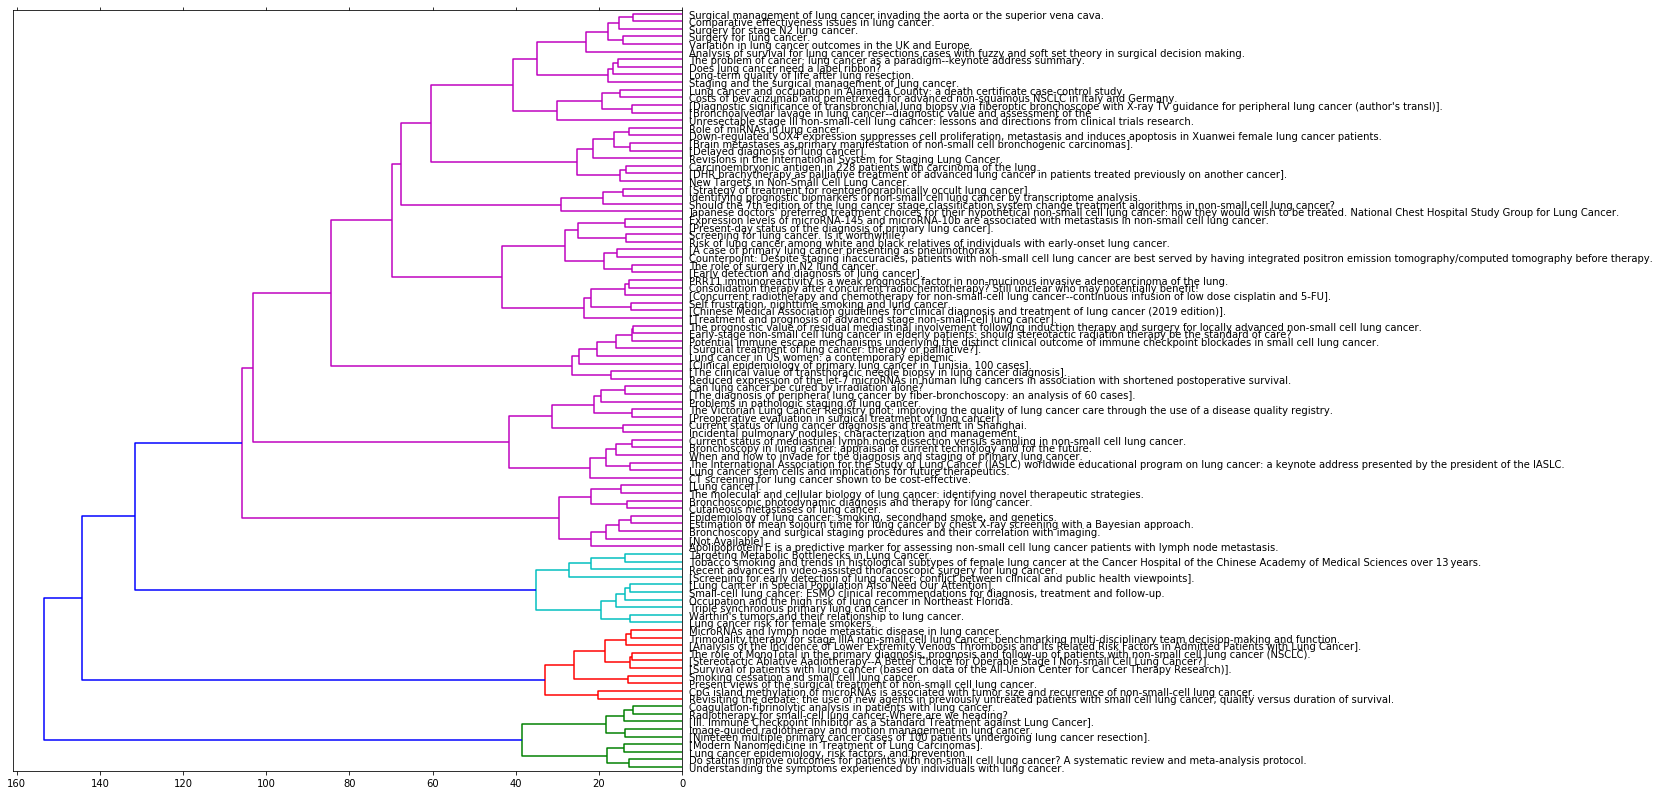

In [8]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           pubmed_data=PubMed,
                           figure_size=(12, 14))

In [30]:
PubMed['Ward_cluster'] = fcluster(linkage_matrix, 60, criterion='distance')

In [33]:
pubmed_clusters = (PubMed[['PUMID', 'Title', 'Ward_cluster']]
                  .sort_values(by=['Ward_cluster', 'PUMID'], 
                               ascending=True))
pubmed_clusters

,PUMID,Title,Ward_cluster
1914,53620,Letter: Prevalence and duration of undetected ...,1
1668,57477,Letter: Breast cancer and preceding breast dis...,1
1561,70077,Role of simple mastectomy in treating patients...,1
1055,169381,Estrogen receptor assay in human breast cancer.,1
1460,190078,Estrogen receptor in breast cancer of the Japa...,1
...,...,...,...
7009,32495017,Radical hysterectomy for early cervical cancer...,10
4255,32608553,Identification of functional long non-coding R...,10
6613,32664098,Characteristics and prognosis of primary malig...,10
6149,32760099,Radiation dose escalation can improve local di...,10


In [34]:
pubmed_clusters.to_excel('../Output/Ward_Cluster_Output.xlsx', index=False) 

In [37]:
pubmed_clusters = (PubMed[['PUMID', 'Title', 'Ward_cluster']]
                  .sort_values(by=['Ward_cluster', 'PUMID'], 
                               ascending=True)
                  .groupby('Ward_cluster').head(20))
pubmed_clusters

,PUMID,Title,Ward_cluster
1914,53620,Letter: Prevalence and duration of undetected ...,1
1668,57477,Letter: Breast cancer and preceding breast dis...,1
1561,70077,Role of simple mastectomy in treating patients...,1
1055,169381,Estrogen receptor assay in human breast cancer.,1
1460,190078,Estrogen receptor in breast cancer of the Japa...,1
...,...,...,...
6142,398752,[Leiomyoma of the esophagus. (Case report)].,10
4257,462227,[Importance of health education work in preven...,10
6354,469319,[Evaluation of surgical management and postope...,10
6530,469320,[Postoperative long-term chemotherapy combined...,10


In [40]:
# get key features for each cluster
# get movies belonging to each cluster

NUM_CLUSTERS = 10

for cluster_num in range(1, NUM_CLUSTERS+1):
    pubmed_articles = pubmed_clusters[pubmed_clusters['Ward_cluster'] == cluster_num]['Title'].values.tolist()
    print('CLUSTER #'+str(cluster_num)+'\n')
    print()
    print('PubMed Titles:', pubmed_articles)
    print('-'*80)

CLUSTER #1


PubMed Titles: ['Letter: Prevalence and duration of undetected breast cancer.', 'Letter: Breast cancer and preceding breast disease.', 'Role of simple mastectomy in treating patients with breast cancer.', 'Estrogen receptor assay in human breast cancer.', 'Estrogen receptor in breast cancer of the Japanese.', '[Modern possibilities in the comprehensive treatment of breast cancer].', 'Thyroid disease in relation to breast cancer.', 'Combined chemotherapy-radiotherapy approach in locally advanced (T3b-T4) breast cancer.', "[The value of postoperative irradiation in the curative management of breast cancer (author's transl)].", '[Breast cancer in combination with other malignant tumors].', '[Metastatic pleurisy in breast cancer].', 'Screening is not diagnosis.', 'Problems and prospects of cancer of the breast in India.', 'The role of lymphadenectomy in curative surgery for gastric cancer.', 'The breast cancer controversy.', 'Evaluation of biochemical markers in breast cancer.

## Select one article (using "PUMID"), from each cluster and extract top 5 similiarest articles (instances)

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

doc_sim = cosine_similarity(tv_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.061515,0.088812,0.074249,0.097627,0.030607,0.113703,0.062316,0.054583,0.055684,...,0.007435,0.016421,0.029709,0.041221,0.012108,0.012048,0.041185,0.027924,0.011591,0.020964
1,0.061515,1.000000,0.074174,0.088862,0.068625,0.037924,0.171106,0.115116,0.069546,0.135795,...,0.017958,0.044825,0.028957,0.027395,0.018010,0.155452,0.023099,0.028555,0.025803,0.028207
2,0.088812,0.074174,1.000000,0.137289,0.110647,0.058015,0.248487,0.111255,0.080277,0.081217,...,0.009129,0.036299,0.009844,0.015768,0.020715,0.012955,0.225336,0.009698,0.005016,0.007722
3,0.074249,0.088862,0.137289,1.000000,0.109521,0.071664,0.247494,0.093393,0.080238,0.056884,...,0.049775,0.023406,0.009157,0.027696,0.034338,0.012724,0.011421,0.016919,0.010655,0.011032
4,0.097627,0.068625,0.110647,0.109521,1.000000,0.044762,0.157064,0.069573,0.061845,0.044650,...,0.004479,0.018916,0.030967,0.008876,0.036243,0.021370,0.042591,0.033074,0.008619,0.003658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.012048,0.155452,0.012955,0.012724,0.021370,0.012357,0.018038,0.033188,0.015994,0.021941,...,0.054799,0.146896,0.055373,0.103847,0.063855,1.000000,0.067035,0.083979,0.077338,0.112880
9996,0.041185,0.023099,0.225336,0.011421,0.042591,0.007293,0.033225,0.008350,0.024374,0.048804,...,0.030455,0.122245,0.045901,0.038382,0.065740,0.067035,1.000000,0.094757,0.057887,0.060383
9997,0.027924,0.028555,0.009698,0.016919,0.033074,0.014134,0.010902,0.015690,0.012249,0.041560,...,0.096783,0.156038,0.059505,0.044596,0.101673,0.083979,0.094757,1.000000,0.059989,0.067853
9998,0.011591,0.025803,0.005016,0.010655,0.008619,0.010631,0.014759,0.002436,0.007899,0.016626,...,0.030624,0.142499,0.102864,0.058796,0.212628,0.077338,0.057887,0.059989,1.000000,0.039349


In [42]:
pubmed_list = PubMed['Title'].values
pubmed_list, pubmed_list.shape

(array(['Understanding the symptoms experienced by individuals with lung cancer.',
        'Do statins improve outcomes for patients with non-small cell lung cancer? A systematic review and meta-analysis protocol.',
        'Lung cancer epidemiology, risk factors, and prevention.', ...,
        'Intravesical irrigation with distilled water during and immediately after transurethral resection and later for superficial bladder cancer.',
        'Ileal neobladder in women with bladder cancer: cancer control and functional aspects.',
        'Molecular Subtype Profiling of Urothelial Carcinoma Using a Subtype-Specific Immunohistochemistry Panel.'],
       dtype=object), (10000,))

In [43]:
import numpy as np

def similar_articles(pubmed_title, article=pubmed_list, doc_sims=doc_sim_df):
    # find pubmed index
    pubmed_idx = np.where(article == pubmed_title)[0][0]
    # get article similarities
    article_similarities = doc_sims.iloc[pubmed_idx].values
    # get top 5 similar pubmed article IDs
    similar_pubmed_idxs = np.argsort(-article_similarities)[1:6]
    # get top 5 article
    similar_article = article[similar_pubmed_idxs]
    # return the top 5 similar articles
    return similar_article

In [45]:
articles= []
articles_cluster = []
for i in range(1,NUM_CLUSTERS+1):
    pubmed_articles = pubmed_clusters[pubmed_clusters['Ward_cluster'] == i]['Title'].values.tolist()
    articles.append(pubmed_articles[0])
    articles_cluster.append(i)
articles

['Letter: Prevalence and duration of undetected breast cancer.',
 'Epidemiology of prostate cancer with special reference to the role of diet.',
 'Letter: Mortality from lung cancer.',
 'The local, regional and systemic attack on bladder cancer.',
 '[Association of tuberculosis and thyroid cancer. Value of exploratory cervicotomy].',
 '[Combined operations in stomach cancer].',
 '[First results of the work of the urban cytological laboratory].',
 'Adenocarcinoma of the uterine cervix. An evaluation of the available diagnostic methods.',
 '[Cytological diagnosis of stomach cancer].',
 '[Esophago-intestinal bypass anastomoses for inoperable cancer of the proximal portion of the stomach and abdominal portion of the esophagus].']

In [49]:
data = {'Title': [], 'Ward_cluster': [], 'Similar_Title': [], 'Similar_cluster': []}
df_similar = pd.DataFrame(data)
df_similar

,Title,Ward_cluster,Similar_Title,Similar_cluster


In [50]:
cluster = 1
for article in articles:
    print('Article Title from Cluster', cluster, ':', article)
    print()
    print('Top 5 similar article:')
    five_similar_articles = similar_articles(pubmed_title=article)
    for one_article in five_similar_articles:
        article_details = PubMed.loc[PubMed['Title'] == one_article]
        print('From Cluster', article_details['Ward_cluster'].tolist()[0], 'Title :', one_article)
        new_row = {'Title': article, 'Ward_cluster': cluster, 'Similar_Title': one_article, 'Similar_cluster': article_details['Ward_cluster'].tolist()[0]}
        df_similar = df_similar.append(new_row, ignore_index=True)
    print('-'*80)
    print()
    cluster+=1

Article Title from Cluster 1 : Letter: Prevalence and duration of undetected breast cancer.

Top 5 similar article:
From Cluster 1 Title : Expression profiling technology: its contribution to our understanding of breast cancer.
From Cluster 1 Title : Prospective Validation of a Genomic Assay in Breast Cancer: The 70-gene MammaPrint Assay and the MINDACT Trial.
From Cluster 1 Title : High incidence of breast cancer in thyroid cancer patients.
From Cluster 1 Title : Breast cancer screening.
From Cluster 1 Title : Translational Genomics: Practical Applications of the Genomic Revolution in Breast Cancer.
--------------------------------------------------------------------------------

Article Title from Cluster 2 : Epidemiology of prostate cancer with special reference to the role of diet.

Top 5 similar article:
From Cluster 2 Title : Trends in prostate cancer incidence and mortality: an analysis of mortality change by screening intensity.
From Cluster 2 Title : [A case-control study of p

In [51]:
df_similar

,Title,Ward_cluster,Similar_Title,Similar_cluster
0,Letter: Prevalence and duration of undetected ...,1.0,Expression profiling technology: its contribut...,1.0
1,Letter: Prevalence and duration of undetected ...,1.0,Prospective Validation of a Genomic Assay in B...,1.0
2,Letter: Prevalence and duration of undetected ...,1.0,High incidence of breast cancer in thyroid can...,1.0
3,Letter: Prevalence and duration of undetected ...,1.0,Breast cancer screening.,1.0
4,Letter: Prevalence and duration of undetected ...,1.0,Translational Genomics: Practical Applications...,1.0
5,Epidemiology of prostate cancer with special r...,2.0,Trends in prostate cancer incidence and mortal...,2.0
6,Epidemiology of prostate cancer with special r...,2.0,[A case-control study of prostate cancer].,2.0
7,Epidemiology of prostate cancer with special r...,2.0,Summaries for patients. Screening for prostate...,2.0
8,Epidemiology of prostate cancer with special r...,2.0,Linking fatherhood to prostate cancer risk.,2.0
9,Epidemiology of prostate cancer with special r...,2.0,What role does stereotactic ablative radiother...,2.0
